# **Flight Price Prediction**

**1.Data understanding**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
df=pd.read_excel("/content/Data_Train.xlsx")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.shape

(10683, 11)

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


**2.EDA**

In [10]:
# OR we can also use this methord.

#df['Date']=df['Date_of_Journey'].str.split('/').str[0]
#df['Month']=df['Date_of_Journey'].str.split('/').str[1]
#df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [11]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df['Journey_month']=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.month

In [12]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
df.drop(['Additional_Info'],axis=1,inplace=True)

In [14]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [15]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,1,3


In [16]:
df.drop(['Arrival_Time'],axis=1,inplace=True)
df.drop(['Dep_Time'],axis=1,inplace=True)
df.drop(['Route'],axis=1,inplace=True)


In [17]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3


In [18]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [19]:
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [20]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,7,25
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,4,45


In [21]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [22]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [23]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,3897,24,3,2,50
1,Air India,Kolkata,Banglore,7h 25m,2.0,7662,1,5,7,25
2,Jet Airways,Delhi,Cochin,19h,2.0,13882,9,6,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,6218,12,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,13302,1,3,4,45


In [24]:
df.drop(['Duration'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


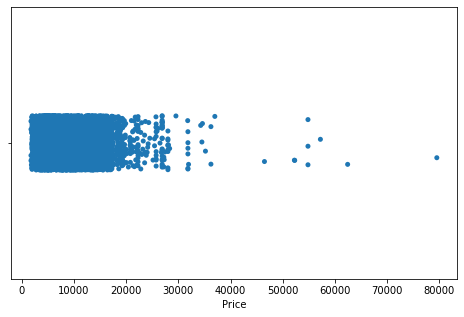

In [26]:
plt.figure(figsize=(8,5))
sns.stripplot(df['Price'])

In [27]:
for i in df.columns:
  print(df[i].value_counts())
  print("-------------------------------")

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
-------------------------------
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
-------------------------------
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
-------------------------------
1.0    5625
0.0    3491
2.0    1520
3.0      45
4.0       1
Name: Total_Stops, dtype: int64
----------------------------

In [28]:
df.shape

(10683, 9)

In [29]:
df.isnull().sum()

Airline           0
Source            0
Destination       0
Total_Stops       1
Price             0
Journey_day       0
Journey_month     0
Duration_hours    0
Duration_mins     0
dtype: int64

In [30]:
df=df.dropna()

In [31]:
df.shape

(10682, 9)

In [32]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


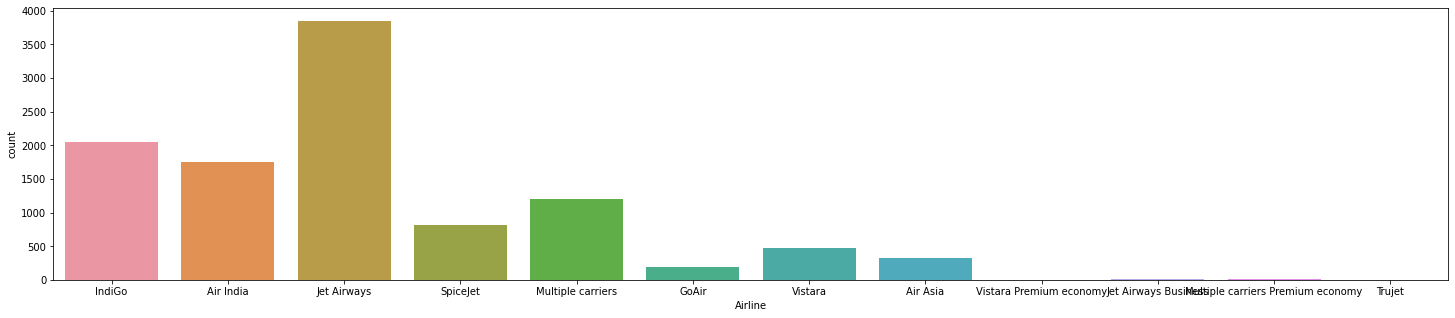

In [33]:
plt.figure(figsize=(25,5))
sns.countplot(df['Airline'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

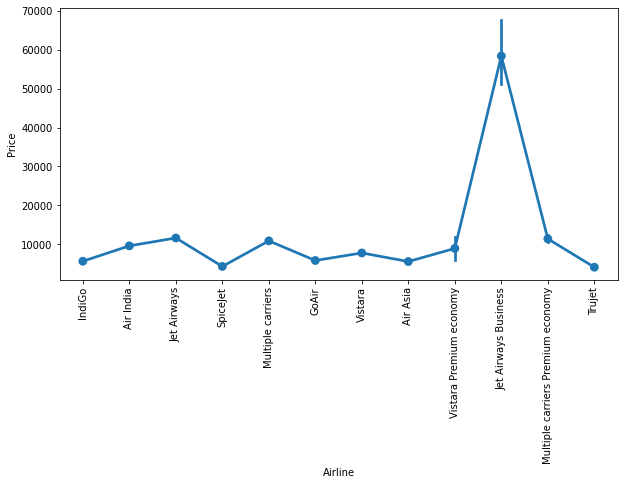

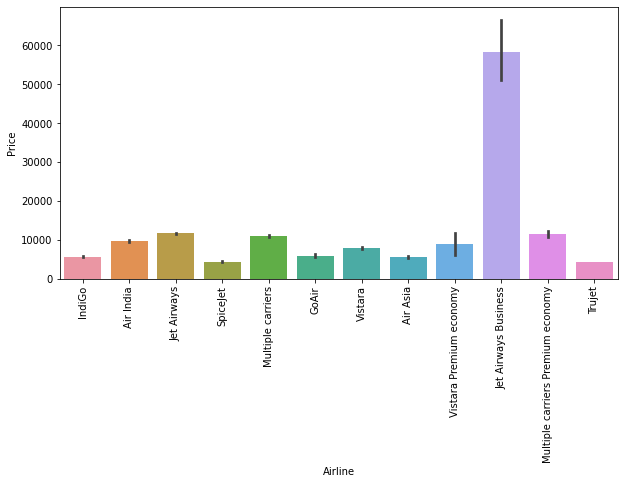

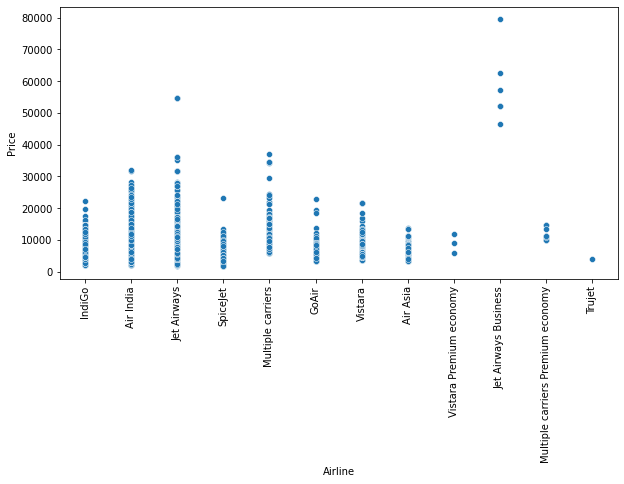

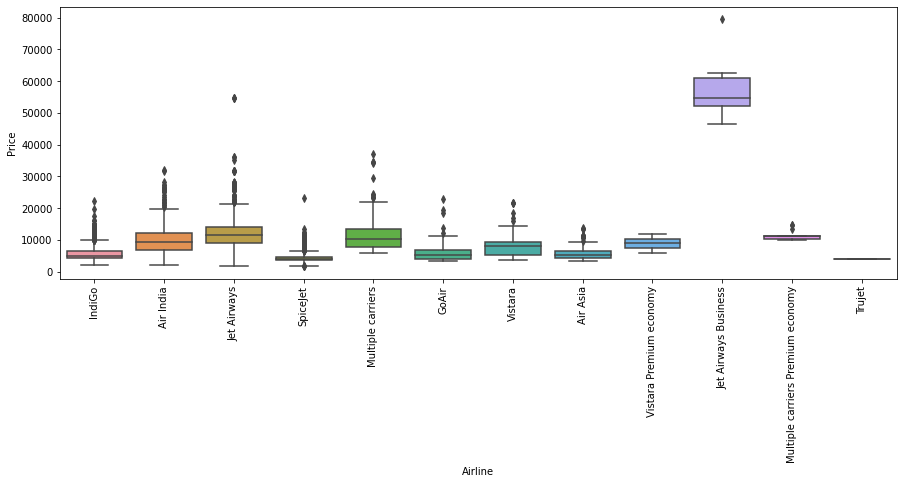

In [34]:
plt.figure(figsize=(10,5))

sns.pointplot(df['Airline'],df['Price'])
plt.xticks(rotation=90)
plt.figure(figsize=(10,5))

sns.barplot(df['Airline'],df['Price'])
plt.xticks(rotation=90)

plt.figure(figsize=(10,5))
sns.scatterplot(df['Airline'],df['Price'])
plt.xticks(rotation=90)

plt.figure(figsize=(15,5))
sns.boxplot(df['Airline'],df['Price'])
plt.xticks(rotation=90)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Airline         10682 non-null  object 
 1   Source          10682 non-null  object 
 2   Destination     10682 non-null  object 
 3   Total_Stops     10682 non-null  float64
 4   Price           10682 non-null  int64  
 5   Journey_day     10682 non-null  int64  
 6   Journey_month   10682 non-null  int64  
 7   Duration_hours  10682 non-null  int64  
 8   Duration_mins   10682 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 1.1+ MB


### **Skewness**

In [36]:
df.skew()

Total_Stops       0.317109
Price             1.812405
Journey_day       0.118174
Journey_month    -0.387409
Duration_hours    0.851197
Duration_mins    -0.090680
dtype: float64

There is no skewness present in the data. since Price column is our dependent variable we cannot perform skewness removal on that.

**3.Data Preprocessing**

In [37]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,2,50
1,Air India,Kolkata,Banglore,2.0,7662,1,5,7,25
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,19,0
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,5,25
4,IndiGo,Banglore,New Delhi,1.0,13302,1,3,4,45


**encoding**

In [38]:
x= df.drop(columns='Price')
y= df['Price']
x= pd.get_dummies(x, prefix_sep="_")
x.head()

,Total_Stops,Journey_day,Journey_month,Duration_hours,Duration_mins,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,24,3,2,50,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2.0,1,5,7,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,2.0,9,6,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1.0,12,5,5,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1.0,1,3,4,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [39]:
x.shape

(10682, 28)

In [40]:
y.shape

(10682,)

**train_test_split**

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47)

In [47]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)

In [48]:
x_test=pd.DataFrame(x_test_norm)
x_train=pd.DataFrame(x_train_norm)

In [49]:
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
count,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000,8545.0,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000
mean,0.206173,0.480443,0.571250,0.217245,0.515059,0.031246,0.166179,0.019075,0.191340,0.357519,0.000351,0.113166,0.000936,0.074547,0.0,0.045290,0.000351,0.206788,0.035342,0.421533,0.272557,0.063780,0.272557,0.421533,0.119719,0.063780,0.035342,0.087068
std,0.169583,0.326502,0.387893,0.179874,0.308585,0.173993,0.372263,0.136798,0.393379,0.479297,0.018735,0.316814,0.030585,0.262674,0.0,0.207951,0.018735,0.405026,0.184654,0.493833,0.445301,0.244375,0.445301,0.493833,0.324652,0.244375,0.184654,0.281952
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.192308,0.000000,0.042553,0.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.250000,0.423077,0.666667,0.170213,0.545455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.250000,0.769231,1.000000,0.319149,0.818182,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**finding best random_state**

In [ ]:
from sklearn.metrics import r2_score
d=5
for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=i)
  lm=LinearRegression()
  lm.fit(x_train,y_train)
  pred_train=lm.predict(x_train)
  pred_test = lm.predict(x_test)
  a=r2_score(y_train,pred_train)
  b=r2_score(y_test,pred_test)
  c=a-b
  print(i,c)
  if d>=c:
    d=c
    print("least value",i,d)

0 0.04273439060277795
least value 0 0.04273439060277795
1 0.029119331931275028
least value 1 0.029119331931275028
2 0.022475069601285425
least value 2 0.022475069601285425
3 0.039543399532365076
4 -0.008136025540767644
least value 4 -0.008136025540767644
5 -0.014777314517602114
least value 5 -0.014777314517602114
6 0.0035171382605110324
7 -0.03322934703877689
least value 7 -0.03322934703877689
8 -0.009640232467039711
9 0.018004865488229993
10 0.06090043446273685
11 4.282180092718413e-05
12 0.027527969419636866
13 -0.04513878436914309
least value 13 -0.04513878436914309
14 -0.03768704130169642
15 0.00602824809748026
16 0.003000208829916584
17 -0.03912705834212016
18 -0.02528765368168917
19 -0.006491807676764272
20 0.014177350844739478
21 0.026347811862212134
22 0.03296670701927895
23 0.025321874848477144
24 0.02714836732880621
25 -0.01527444186888427
26 -0.011263825272381678
27 0.07725502721175048
28 0.03282241785699935
29 0.0700462740410337
30 0.0085057302088144
31 0.02108274510442154


In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=57)

**Model Construction**

LinearRegression

In [52]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.6065576883340656


In [53]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,LR_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,LR_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,LR_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,LR_predict))
print('r2_score:',r2_score(y_test,LR_predict))

Mean Absolute Error:  1926.3813694077394
Mean Squared Error:  7081069.989121717
Root Mean Squared Error:  2661.0279948023317
Explained Variance Score:  0.6794216223225145
r2_score: 0.6793431857811936


RandomForestRegressor

In [54]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predictions1=rf.predict(x_test)
print(rf.score(x_train,y_train))

0.92369808999892


In [55]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions1))
print('r2_score:',r2_score(y_test,predictions1))

Mean Absolute Error:  1327.1572864856553
Mean Squared Error:  4528074.491530884
Root Mean Squared Error:  2127.9272759027467
Explained Variance Score:  0.7949578518953242
r2_score: 0.7949521833239465


DecisionTreeRegressor

In [56]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.9406117958005419


In [57]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_PRED))
print('r2_score:',r2_score(y_test,DTR_PRED))

Mean Absolute Error:  1510.9063362364252
Mean Squared Error:  6426755.248675585
Root Mean Squared Error:  2535.104583380257
Explained Variance Score:  0.7090818553665219
r2_score: 0.7089729564924256


**Gradient Boosting Regressor**

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.7659096031384756


In [59]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,GBR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,GBR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_PRED))
print('r2_score:',r2_score(y_test,GBR_PRED))

Mean Absolute Error:  1515.5218979549031
Mean Squared Error:  4602057.21529057
Root Mean Squared Error:  2145.2405961314853
Explained Variance Score:  0.7916083871462631
r2_score: 0.7916019743097077


**Hyper parameter tuning**

In [ ]:
RF=RandomForestRegressor()
param={
     'n_estimators':[100,200,],
    'criterion':["mse", "mae"],
    'min_samples_split':[2],
   'min_samples_leaf' : [1],
}

In [ ]:
from sklearn.model_selection import GridSearchCV
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4)

In [ ]:
RF_grid.fit(x_train,y_train)
RF_grid_PRED=RF_grid.best_estimator_.predict(x_test)

In [ ]:
RF_grid.best_params_

{'criterion': 'mae',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [60]:
rf=RandomForestRegressor(criterion='mae',min_samples_leaf=1,min_samples_split=2,n_estimators=200)
rf.fit(x_train,y_train)
rf_predictions=rf.predict(x_test)

In [ ]:
print(rf.score(x_train,y_train))

0.9131419634562388


In [61]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,rf_predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,rf_predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,rf_predictions)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,rf_predictions))
print('r2_score:',r2_score(y_test,rf_predictions))

Mean Absolute Error:  1284.313840664483
Mean Squared Error:  4517364.476419457
Root Mean Squared Error:  2125.409249161078
Explained Variance Score:  0.7954587448268906
r2_score: 0.7954371720800442


In [64]:
print(rf_predictions)

[7570.71  7563.36  3875.2   ... 5208.7   5129.745 6120.105]


Final Model

In [ ]:
import joblib
joblib.dump(rf,"finalmodel.pkl")

['finalmodel.pkl']